In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [76]:
oo = pd.read_csv('medali.csv', skiprows=4)

# Task #L10.2

## На какой дистанции Jesse Owens выйграл медаль?

In [91]:
find_distance = re.compile('\w*\dm')
oo[(oo['Athlete'] == 'OWENS, Jesse') & (oo.Event.apply(find_distance.match))]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold


## Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне? Отсортировать результат в алфавитном порядке по имени игрока.

In [93]:
res = oo[(oo.Medal == 'Gold') & (oo.Gender == 'Men') & (oo.Discipline == 'Badminton')]
noc = dat.NOC.value_counts().index[0]
res[(res.NOC == noc)].sort_values('Athlete')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
27725,Beijing,2008,Badminton,Badminton,"KIDO, Markis",INA,Men,doubles,M,Gold
21771,Atlanta,1996,Badminton,Badminton,"MAINAKY, Rexy Ronald",INA,Men,doubles,M,Gold
27726,Beijing,2008,Badminton,Badminton,"SETIAWAN, Hendra",INA,Men,doubles,M,Gold
21772,Atlanta,1996,Badminton,Badminton,"SUBAGJA, Ricky Achmad",INA,Men,doubles,M,Gold
23702,Sydney,2000,Badminton,Badminton,"WIJAYA, Candra",INA,Men,doubles,M,Gold


## Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [99]:
pd.DataFrame(oo[(oo.Edition >= 1984) & (oo.Edition <= 2008)].NOC.value_counts()[:3])

,NOC
USA,1837
AUS,762
GER,691


## Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [244]:
gold_medalists = (oo['Gender'] == 'Men') & (oo['Medal'] == 'Gold') & (oo['Event'] == '100m')
oo[gold_medalists][['City','Edition','Athlete','NOC']].sort_values(by='Edition', ascending=False)

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


# Task #L10.3

## Используя groupby(), постройте график число всех медалей выйгранных на каждой олимпиаде.

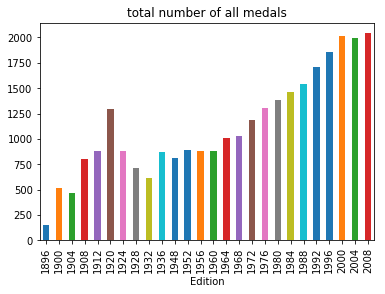

In [102]:
oo.groupby('Edition')['Medal'].count().plot(kind='bar', title='total number of all medals')

## Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [29]:
result_lst = oo.groupby(['NOC']).agg({'Medal': ['count'], 'Edition': ['min', 'max']})
result_lst

Medal Edition      
    count     min   max
NOC                    
AFG     1    2008  2008
AHO     1    1988  1988
ALG    14    1984  2008
ANZ    29    1908  1912
ARG   239    1924  2008
ARM     9    1996  2008
AUS  1075    1896  2008
AUT   146    1896  2008
AZE    16    1996  2008
BAH    23    1956  2008
BAR     1    2000  2000
BDI     1    1996  1996
BEL   408    1900  2008
BER     1    1976  1976
BLR    92    1996  2008
BOH     7    1900  1908
BRA   372    1920  2008
BUL   331    1952  2008
BWI     5    1960  1960
CAN   592    1900  2008
CHI    33    1928  2008
CHN   679    1984  2008
CIV     1    1984  1984
CMR    22    1968  2008
COL    11    1972  2008
CRC     4    1988  2000
CRO    79    1992  2008
CUB   395    1900  2008
CZE    41    1996  2008
DEN   491    1896  2008
..    ...     ...   ...
SRI     2    1948  2000
SUD     1    2008  2008
SUI   376    1896  2008
SUR     2    1988  1992
SVK    29    1996  2008
SWE  1021    1900  2008
SYR     3    1984  2004
TAN     2    1980  1980
TCH   329    1920  1992
TGA     1    1996  1996
THA    21    1976  2008
TJK     2    2008  2008
TOG     1    2008  2008
TPE    42    1960  2008
TRI    20    1948  2008
TUN     7    1964  2008
TUR    82    1936  2008
UAE     1    2004  2004
UGA     6    1968  1996
UKR   148    1996  2008
URS  2049    1952  1988
URU    76    1924  2000
USA  4335    1896  2008
UZB    17    1996  2008
VEN    11    1952  2008
VIE     2    2000  2008
YUG   435    1924  2000
ZAM     2    1984  1996
ZIM    23    1980  2008
ZZX    48    1896  1904

[138 rows x 3 columns]

# Task #L10.4

## Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике?

Text(0.5,0,'Number of gold medals')

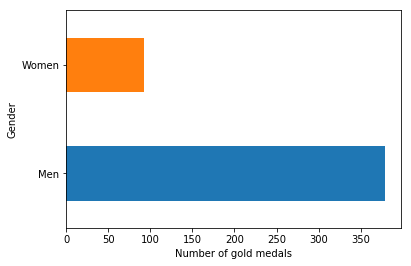

In [116]:
oo[(oo.NOC == 'USA') & (oo.Medal == 'Gold') & (oo.Discipline == 'Athletics')].groupby('Gender').size().plot(kind='barh')
plt.xlabel('Number of gold medals')

## Постройте график 5 атлетов которые выйграли большинство золотых медалей.

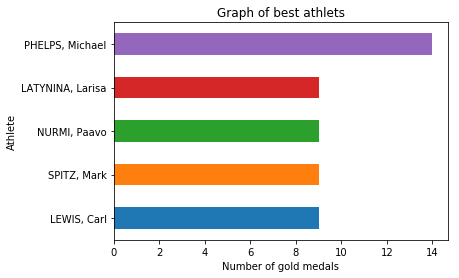

In [115]:
top_athlets = oo[oo.Medal == 'Gold'].groupby('Athlete').size()
top_graph = top_athlets.sort_values(ascending=False)[:5]
top_graph[::-1].plot(kind='barh', title='Graph of best athlets')
plt.xlabel('Number of gold medals')

# HW Задание 10.1 - Таблица атлетов

**Необходимо построить таблицу, в которой по всем годам олимпиады должны отображаться топовые атлеты США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.**

**Результирующая таблица должна содержать столбцы: ``Idx``, ``Edition``, ``Athlete``, ``Discipline``, ``Bronze``, ``Gold``, ``Silver``, ``Total``**

In [248]:
# all athletes from USA
usa_athletes = oo[oo.NOC == 'USA'].groupby(['Edition', 'Athlete', 'Discipline', 'Medal']).\
                                        size().unstack('Medal', fill_value=0)
# count total medals
usa_athletes['Total'] = usa_athletes.apply(lambda row: row.Bronze + row.Gold + row.Silver, axis = 1)
# create table we needed
usa_athletes = usa_athletes.groupby('Edition').apply(lambda x: x[x['Total'] == x['Total'].max()][:1])
usa_athletes.index = usa_athletes.index.droplevel(0)
# create indexes column
usa_athletes.columns.name = 'Idx'
usa_athletes.reset_index(inplace=True)

usa_athletes

Idx,Edition,Athlete,Discipline,Bronze,Gold,Silver,Total
0,1896,"GARRETT, Robert",Athletics,0,2,2,4
1,1900,"BAXTER, Irving",Athletics,0,2,3,5
2,1904,"DOWNING, Burton",Cycling Track,1,2,3,6
3,1908,"SHEPPARD, Melvin",Athletics,0,3,0,3
4,1912,"OSBURN, Carl Townsend",Shooting,1,1,2,4
5,1920,"LEE, Willis",Shooting,1,5,1,7
6,1924,"EDERLE, Gertrude",Swimming,2,1,0,3
7,1928,"BARBUTI, Raymond James",Athletics,0,2,0,2
8,1932,"DIDRIKSON, Mildred",Athletics,0,2,1,3
9,1936,"OWENS, Jesse",Athletics,0,4,0,4
